# Color Finder e StreetLight Recognition

In questo foglio affronteremo il problema di trovare un colore in un'immagine e di conseguenze di riconoscere il colore attualmente emesso da un semaforo.<br>
Nota importante: vi ricordo che dal foglio precedente abbiamo scoperto come riconoscere gli aruco markers, quindi ponendo un marker vicino ad ogni semaforo abbiamo un'informazione su quando far partire questo algoritmo.

## Color Finder

Anche qui continuiamo la costruzione a classi.<br>
Partiamo dall'importare le librerie necessarie.

In [1]:
import cv2
import numpy as np

Come al solito scriverò le funzioni in blocchi separati ma andranno posizionate tutte nella classe, a fine spiegazione riporto la classe completa.

La classe la chiamiamo <font color="red">ColorFinder</font> e partiamo dal suo costruttore.<br>
Partiamo con l'inizializzazione di tutte le variabili della classe, immagine (una matrice numpy), color (touple da 3 numeri tra 0 e 255) ed il raggio d'incertezza (un numero tra 0 e 255 che ci definisce quanto lontano può essere il colore trovato da quello ricercato, la distanza è intesa come componente per componente).

In [ ]:
class ColorFinder():
    def __init__(self, image = None, color = None, radius = None):
        self.image = image #immagine su cui lavoro
        self.color = color #colore da cercare
        self.raggio = radius #raggio di "incertezza"
        if self.image is not None:
            self.width = self.image.shape[0] #larghezza immagine
            self.height = self.image.shape[1] #altezza immagine

Definiamo due funzioni per il cambio dell'immagine, del colore e del raggio

In [ ]:
def changeValues(self, colorNew = None, radiusNew = None):
    if colorNew is not None:
        self.color = colorNew
    if radiusNew is not None:
        self.raggio = radiusNew
        
def newImage(self, imageNew):
    self.image = imageNew
    self.or_image = self.image
    self.width = self.image.shape[0] #larghezza immagine
    self.height = self.image.shape[1] #altezza immagine

Arriviamo al cuore dell'algoritmo con l'utilizzo della funzione <font color="red">inRange</font> fornita da openCV.<br>
Questa funzione prende in pasto un'immagine, un limite inferiore ed un limite superiore per il colore da cercare, e restituisce una matrice in cui ogni colore NON presente nell'intervallo viene mandato a 0, permettendoci di cercare i non-nulli ed avere una maschera del colore cercato.<br>
Per quelli interessati a come venga effettuata l'analisi della presenza nell'intervallo <a href="https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981">linko</a> la documentazione ufficiale.

In [ ]:
def distInRange(self):
    #creo i due vettori di minimo e massimo per il range in cui cercare i colori
    #vengono creati sottraendo o aggiungendo al colore cercato il raggio d'errore
    self.lower = np.array([])
    for i in range(3):
        #per ogni canale del colore sottraggo il raggio e mi accerto che non usciamo dal dominio [0,255]
        if self.color[i]-self.raggio < 0:
            self.lower = np.append(self.lower,0)
        else:
            self.lower = np.append(self.lower, self.color[i]-self.raggio)
    self.upper = np.array([])
    for i in range(3):
        #per ogni canale del colore sottraggo il raggio e mi accerto che non usciamo dal dominio [0,255]
        if self.color[i]+self.raggio > 255:
            self.upper = np.append(self.upper, 255)
        else:
            self.upper = np.append(self.upper, self.color[i]+self.raggio)

    self.bool_Md = cv2.inRange(self.image, self.lower, self.upper)
    
    return self.bool_Md

Scriviamo ora tutta la classe e testiamola.

In [4]:
import cv2
import numpy as np

class ColorFinder():
    def __init__(self, image = None, color = None, radius = None):
        self.image = image
        self.color = color
        self.raggio = radius
        if self.image is not None:
            self.width = self.image.shape[0]
            self.height = self.image.shape[1]
            
    def changeValues(self, colorNew = None, radiusNew = None):
        if colorNew is not None:
            self.color = colorNew
        if radiusNew is not None:
            self.raggio = radiusNew
        
    def newImage(self, imageNew):
        self.image = imageNew
        self.or_image = self.image
        self.width = self.image.shape[0]
        self.height = self.image.shape[1]
        
    def distInRange(self):
        self.lower = np.array([])
        for i in range(3):
            if self.color[i]-self.raggio < 0:
                self.lower = np.append(self.lower,0)
            else:
                self.lower = np.append(self.lower, self.color[i]-self.raggio)
        self.upper = np.array([])
        for i in range(3):
            if self.color[i]+self.raggio > 255:
                self.upper = np.append(self.upper, 255)
            else:
                self.upper = np.append(self.upper, self.color[i]+self.raggio)

        self.bool_Md = cv2.inRange(self.image, self.lower, self.upper)

        return self.bool_Md

<Figure size 432x288 with 0 Axes>

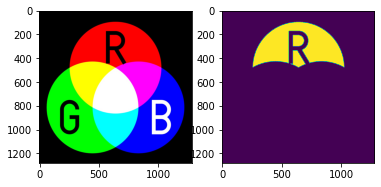

In [19]:
#uso matplotlib per mostrare le figure
import matplotlib.pyplot as plt
image = cv2.imread('part4/img/AdditiveColor.jpg')
#di norma cv2 importa in BGR io devo invertire i canali per la convenzione che usa l'immagine
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cerco il rosso (255,0,0) con incertezza 20
finder = ColorFinder(image, (255,0,0), 20)
redMask = finder.distInRange()

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(image)
axarr[1].imshow(redMask)

## StreetLight Recognition

Ora che abbiamo costruito una funzione atta all'identificazione dello spazio occupato da un colore in un'immagine, possiamo andare a valutare il colore più presente su un semaforo acceso, questo ci dirà se esso sia Rosso, Giallo o Verde.

Andiamo allora a costruire la classe <font color="red">StreetLight</font> con le usuali funzioni di costruttore e cambio immagine.

In [ ]:
class StreetLight:
    def __init__(self, image=None):
        self.image = image
        if self.image is not None:
            #prendo le dimensioni dell'immagine
            self.width = math.trunc(self.image.shape[0])
            self.height = math.trunc(self.image.shape[1])
            #mi fisso anche due coordinate del rettangolo dell'immagine
            #RICORDO: le immagini hanno sistema di riferimento che parte in alto a SX
            self.SO = (0, self.height)
            self.NE = (self.width, 0)

    def changeImage(self, imageNew=None):
        self.image = imageNew
        if self.image is not None:
            self.width = math.trunc(self.image.shape[0])
            self.height = math.trunc(self.image.shape[1])
            self.SO = (0, self.height)
            self.NE = (self.width, 0)

Implementiamo un'altra funzione che ci sarà utile in seguito per dei controlli sulle traslazioni vicino al bordo.

In [ ]:
#controllo solo le x perché quando effettuerò le operazioni di traslazione mi muoverò solo sull'asse delle x
def inBorder(self, SO, NE):
    if SO[0] < 0:
        SO[0] = 0
    if NE[0] > self.width:
        NE[0] = self.width
    return (int(SO[0][0]), int(SO[1][0])), (int(NE[0][0]), int(NE[1][0]))

Ricordandoci quanto sviluppato nello scorso foglio possiamo porre questa ipotesi fondamentale: <br>
"a DX di ogni semaforo è presente il Aruco Marker corrispondente largo più del semaforo"<br>
Con quest'ipotesi possiamo definire la prossima funzione <font color="red">roi</font>, che restringe la regione d'interesse per quest'algoritmo al solo rettangolo vicino al marker.

In [ ]:
def roi(self, sign):
    coordinates = np.array(sign[0]).T #trasposta perché voglio una riga di coordinate x ed una di coordinate y
    xs = coordinates[0].astype(int) #coordinate x arrotondate all'intero
    ys = coordinates[1].astype(int) #coordinate y arrotondate all'intero
    len = max(xs) - min(xs) #larghezza cartello (rispetto al piano della camera)
    
    yMedia = (max(ys) + min(ys))/2; 
    
    #devo ora prendere la roi che è il rettangolo di uguali dimensioni a sx di quello in input
    xMin = min(xs) - len #il nuovo minimo è il vecchio minimo meno la larghezza
    xMax = min(xs) #il nuovo massimo è il vecchio minimo
    self.SO, self.NE = self.inBorder([xMin, yMedia+len], [xMax, yMedia-len]) #correggo in caso con i conti sono finito "fuori dai bordi"
    return self.SO, self.NE #torno le coordinate del SO e NE del futuro rettangolo di roi

Scriviamo ora una funzione che va a cercare nella roi i 3 colori che ci interessano, ovvero il Rosso, il Giallo ed il Verde.<br>
Per fare ciò creo un finder, chiamo distInRange e poi cambio il colore, facendolo per ogni colore ottengo le maschere cercate, le quali ci daranno una valutazione di quanto è presente un colore rispetto ad un altro.<br>
Per il giallo uso il raggio 60 perché in alcuni semafori è più giallo in altri è più arancione.

In [ ]:
def color(self): 
    #prima provo a cercare il rosso RGB(255,0,0) con raggio 50 => da RGB(205,0,0) a RGB(255,0,0)
    #come immagine prendo la roi calcolata sopra
    #RICORDARE: y viene prima della x
    finder = ColorFinder(image = self.image[self.NE[1]:self.SO[1], self.SO[0]:self.NE[0]], color = (255,0,0), radius = 50)
    self.redMask = finder.distInRange()
    #cerco per il giallo RGB(255,255,0) metto raggio 60 perché il led gialli perdono tanta luminosità con piccoli sbalzi di corrente
    finder.changeValues(colorNew = (255,255,0), radiusNew = 60)
    self.yellowMask = finder.distInRange()
    #cerco per il verde RGB(0,255,0) metto raggio 50 => da RGB(0,205,0) a RGB(0,255,0)
    finder.changeValues(colorNew = (0,255,0), radiusNew = 50)
    self.greenMask = finder.distInRange()
    return self.redMask, self.yellowMask, self.greenMask

Infine calcolo il colore più presente contando gli elementi non nulli delle 3 matrici maschere (i pixel non mandati a zero) e cercando quella con il numero più grande ottengo il colore principale che, nella roi, indica il colore del semaforo.

In [ ]:
def lightColor(self):
    #calcolo quanti pixel occupa un ogni colore così da trovare il colore predominante che ritengo essere il colore del semaforo
    #nota che l'algoritmo viene chiamato solo qundo c'è il cartello del semaforo
    self.r_num = np.count_nonzero(self.redMask)
    self.y_num = np.count_nonzero(self.yellowMask)
    self.g_num = np.count_nonzero(self.greenMask)
    max_num = max([self.r_num, self.y_num, self.g_num])
    if max_num == self.r_num:
        return 'r'
    elif max_num == self.y_num:
        return 'y'
    else: #non metto un'altra conferma perché un massimo esiste per forza
        return 'g'

In [105]:
class StreetLight:

    def __init__(self, image=None):
        self.image = image
        if self.image is not None:
            self.width = math.trunc(self.image.shape[0])
            self.height = math.trunc(self.image.shape[1])
            self.SO = (0, self.height)
            self.NE = (self.width, 0)

    def changeImage(self, imageNew=None):
        self.image = imageNew
        if self.image is not None:
            self.width = math.trunc(self.image.shape[0])
            self.height = math.trunc(self.image.shape[1])
            self.SO = (0, self.height)
            self.NE = (self.width, 0)

    def inBorder(self, SO, NE):
        if SO[0] < 0:
            SO[0] = 0
        if NE[0] > self.width:
            NE[0] = self.width
        return (int(SO[0][0]), int(SO[1][0])), (int(NE[0][0]), int(NE[1][0]))

    def roi(self, sign):
        coordinates = np.array(sign[0]).T 
        xs = coordinates[0].astype(int)
        ys = coordinates[1].astype(int)
        len = max(xs) - min(xs)
        
        yMedia = (max(ys) + min(ys))/2; 
        
        xMin = min(xs) - len
        xMax = min(xs)
        self.SO, self.NE = self.inBorder([xMin, yMedia+len], [xMax, yMedia-len])
        return self.SO, self.NE

    def color(self):
        finder = ColorFinder(image = self.image[self.NE[1]:self.SO[1], self.SO[0]:self.NE[0]], color = (255,0,0), radius = 50)
        self.redMask = finder.distInRange()
       
        finder.changeValues(colorNew = (255,255,0), radiusNew = 60)
        self.yellowMask = finder.distInRange()
        
        finder.changeValues(colorNew = (0,255,0), radiusNew = 50)
        self.greenMask = finder.distInRange()
        return self.redMask, self.yellowMask, self.greenMask

    def lightColor(self):
        self.r_num = np.count_nonzero(self.redMask)
        self.y_num = np.count_nonzero(self.yellowMask)
        self.g_num = np.count_nonzero(self.greenMask)
        max_num = max([self.r_num, self.y_num, self.g_num])
        if max_num == self.r_num:
            return 'r'
        elif max_num == self.y_num:
            return 'y'
        else: 
            return 'g'

Andiamo ora a testare il nostro algoritmo (per l'analisi del marker sfrutteremo la classe del precedente foglio, il codice completo lo trovare in <font color="red">part4/example.py</font>).<br>
Importiamo l'immagine (in RGB) e stampiamola a schermo.

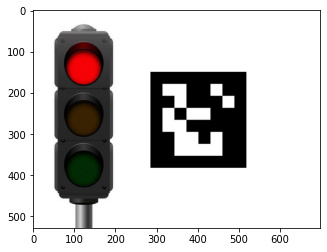

In [119]:
raw_image = cv2.imread('part4/img/semaforo-colori.jpg')
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
plt.imshow(raw_image)

Istanziamo un lettore di aruco e facciamolo agire sull'immagine per calcolare le coordinate dei vertici del marker. (metto None sulla matrice ed il coefficiente perché le immagini some già piatte, se provenissero da un flusso video andrebbero utilizzati i valori presenti in <font color="red">part1/FinalCalibration.yml</font>, come da file commentato)

In [106]:
#file = open("part1/FinalCalibration.yml", "r")
#calibration_data = yaml.load(file, Loader=yaml.UnsafeLoader)
#cam_matrix = calibration_data['camera_matrix']
#dist_coeff = calibration_data['distortion_coefficient']

#detector = ArucoDetector(cam_matrix, dist_coeff)

detector = ArucoDetector(None, None)

In [107]:
#correggo la curvatura derivante dalla camera
#image = detector.undistort(raw_image)

image = raw_image
#calcolo le coordinate dei vertici dei quadrati
corner = detector.frameDetector(image)

Semaforo
Trovato l'id 3 che equivale al cartello Semaforo

[INFO] Trovati 1 aruco



Sfruttiamo la funzione <font color="red">roi</font>, che abbiamo sviluppato sopra, per calcolare la porzione d'immagine contente il semaforo.

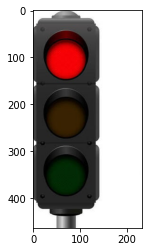

In [110]:
semaforo = StreetLight(image)
SO, NE = semaforo.roi(corner)
plt.imshow(image[NE[1]:SO[1],SO[0]:NE[0]])

Applichiamo ora la funzione <font color="red">color</font> per avere le 3 maschere relative ai colori Rosso, Giallo e Verde.<br>
Le stampo a schermo per mostrare come riescano a riconoscere esattamente il rosso, anche se il verde è presente (anche se come colore "spento").

In [111]:
r,y,g = semaforo.color()

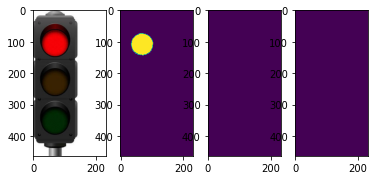

In [120]:
f, axarr = plt.subplots(1,4) 
axarr[0].imshow(image[NE[1]:SO[1],SO[0]:NE[0]])
axarr[1].imshow(r)
axarr[2].imshow(y)
axarr[3].imshow(g)

Chiamiamo infine la funzione <font color="red">lightColor</font> per far riconoscere al sistema il colore più presente tra i 3.

In [115]:
colore = {
    'r' : 'Rosso',
    'g' : 'Giallo',
    'v' : 'Verde'
}.get(semaforo.lightColor())
print(colore)

Rosso


## Riconoscimento Cheems

Ora che sappiamo riconoscere i colori, possiamo anche andare a riconoscere i pedoni della città: i cybercheems. Questi sono caratterizzati da un acceso colore giallo e sfrutteremo questa loro peculiarità per farli notare ad un eventuale robot guidatore.

Potremmo utilizzare le funzioni da noi prima definite, ma ne esiste una versione computazionalmente più efficiente creata da Opencv; questo perchè le funzioni di Opencv sono scritte in c++ (linguaggio di livello inferiore rispetto a python e quindi più veloce) con del codice aggiunto per renderle compatibili con python.

Partiamo col definire i limiti del colore dei cheems. Utilizzeremo ancora lo standard HSV e richiederà un po' di ricerca empirica attraverso la prova di vari filtri.  
Utilizziamo i seguenti come base, sentitevi liberi di sperimentare.

In [ ]:
self.upperCheems = np.array([179, 255, 255])
self.lowerCheems = np.array([0, 95, 180])

Carichiamo ora la foto su cui andremo a lavorare.

In [ ]:
imageCheems = cv2.imread('part4/foto_cheem.JPG')
imageCheems = cv2.cvtColor(raw_image, cv2.COLOR_BGR2HSV)
plt.imshow(imageCheems)

utilizziamo la funzione inRange e poi, come fatto per le linee della strada, effettuiamo un'operazione di **erosione** e di **espansione** per eliminare eventuali buchi o rumori.

In [ ]:
c_image = np.copy(imageCheems)
bool_Md = cv2.inRange(c_image, self.lowerCheems, self.upperCheems)
kernel = np.ones((5, 5), np.uint8)
mg_erode = cv2.erode(bool_Md, kernel, iterations=1)
mg_dilation = cv2.dilate(mg_erode, kernel, iterations=1)

Concludiamo ora con la funzione findContours.

In [ ]:
im2, contours, hierarchy = cv2.findContours(mg_dilation,
                                            cv2.RETR_EXTERNAL,
                                            cv2.CHAIN_APPROX_SIMPLE)

Creiamo una lista con tutti i contorni trovati e andiamo a disegnarli nell'immagine di partenza.

In [ ]:
areas = []
for contour in contours:
    area = cv2.contourArea(contour)
    areas.append(area)
        
cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(image)

Ora sappiamo come identificare eventuali pedoni, e in particolare possiamo sfruttare la dimensione dell'area del contorno per capire quanto questo sia vicino.